<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/Assigment1/MLAA_Notebook_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment Notebook**



## Context


### 0. Import Packages

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 646.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.1 which is incompatible.


In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

### 1.   Load Dataset

Training data

In [3]:
file_url = 'https://drive.google.com/uc?export=download&id=1-IlfTscbeco2Mxn6e_Hu5yAP9qhckSJH'
df_train = pd.read_csv(file_url)
df_train.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.8,2009,84.0,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000
1,988334,m,1990-05-15,57.0,2010,64.5,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000


Vaidation data

In [4]:
file_url_val = 'https://drive.google.com/uc?export=download&id=1_y3VAvfu58ebeAByXY5JaV1_k3pXAZtJ'
df_val = pd.read_csv(file_url_val)
df_val.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1049856,m,1992-11-08,80.00,2010,85.6,14382,2,B.Tech/B.E.,information technology,90.1,14382,1,2014,490,555,465,0.996744,615,-1,623,-1,-1,-1,-1,-0.0154,0.5454,0.3174,-1.3753,-0.2859,355000
1,445828,m,1992-03-25,78.93,2009,70.8,13210,2,B.Tech/B.E.,electronics and communication engineering,65.0,13210,0,2013,385,375,575,0.824666,395,400,-1,-1,-1,366,-1,-0.5719,0.5008,-0.6343,0.4148,-0.1690,240000


testing data

In [5]:
file_url_test = 'https://drive.google.com/uc?export=download&id=1-GviBcJoaYHdwCjXvsg2zMdOAGiPsNb7'
df_test = pd.read_csv(file_url_test)
df_test.head(2)

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,1066913,m,1993-05-03,75.0,2010,60.40,13599,2,B.Tech/B.E.,electrical engineering,72.0,13599,1,2014,350,445,510,0.557390,-1,324,-1,-1,420,-1,-1,-0.5116,-1.6191,-0.7585,-0.1076,-0.2511,120000
1,1258784,m,1993-01-20,97.0,2010,95.08,566,2,B.Tech/B.E.,electronics and communication engineering,89.0,566,0,2014,440,395,545,0.493596,355,324,-1,-1,-1,-1,-1,1.4208,0.7119,-0.7585,-1.6289,-0.8608,200000


### 2. Explore Dataset

In [6]:
df = df_train.copy(deep=True)

In [7]:
df.isnull().sum()

id                       0
gender                   0
dob                      0
10percentage             0
12graduation             0
12percentage             0
collegeid                0
collegetier              0
degree                   0
specialization           0
collegegpa               0
collegecityid            0
collegecitytier          0
graduationyear           0
english                  0
logical                  0
quant                    0
domain                   0
computerprogramming      0
electronicsandsemicon    0
computerscience          0
mechanicalengg           0
electricalengg           0
telecomengg              0
civilengg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
openess_to_experience    0
salary                   0
dtype: int64

calculate the age of each person

In [8]:
df['dob'] = pd.to_datetime(df['dob'])

# Calcular la edad y asignarla a una nueva columna llamada 'age'
df['age'] = df['dob'].apply(lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day)))


In [9]:
df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)


In [10]:

df.dtypes


id                               object
gender                           object
dob                      datetime64[ns]
10percentage                    float64
12graduation                      int64
12percentage                    float64
collegeid                        object
collegetier                      object
degree                           object
specialization                   object
collegegpa                      float64
collegecityid                    object
collegecitytier                  object
graduationyear                    int64
english                           int64
logical                           int64
quant                             int64
domain                          float64
computerprogramming               int64
electronicsandsemicon             int64
computerscience                   int64
mechanicalengg                    int64
electricalengg                    int64
telecomengg                       int64
civilengg                         int64


In [11]:
df.describe(include='all')

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age
count,2998,2998,2998,2998.000000,2998.000000,2998.000000,2998,2998,2998,2998,2998.000000,2998,2998,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000
unique,2998,2,NaN,NaN,NaN,NaN,1173,2,4,42,NaN,1173,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,604399,m,NaN,NaN,NaN,NaN,272,2,B.Tech/B.E.,electronics and communication engineering,NaN,272,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2282,NaN,NaN,NaN,NaN,67,2772,2757,670,NaN,67,2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1990-12-06 14:02:00.080053376,77.666264,2008.080720,74.341061,NaN,NaN,NaN,NaN,71.509857,NaN,NaN,2011.939960,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,94.147098,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05,32.780854
min,NaN,NaN,1981-05-06 00:00:00,43.000000,1998.000000,40.000000,NaN,NaN,NaN,NaN,6.630000,NaN,NaN,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04,26.000000
25%,NaN,NaN,1989-11-11 06:00:00,71.140000,2007.000000,66.000000,NaN,NaN,NaN,NaN,66.530000,NaN,NaN,2012.000000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05,32.000000
50%,NaN,NaN,1991-03-05 00:00:00,78.965000,2008.000000,74.000000,NaN,NaN,NaN,NaN,71.800000,NaN,NaN,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05,33.000000
75%,NaN,NaN,1992-03-09 18:00:00,85.600000,2009.000000,82.600000,NaN,NaN,NaN,NaN,76.300000,NaN,NaN,2014.000000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05,34.000000
max,NaN,NaN,1997-05-27 00:00:00,97.760000,2012.000000,98.700000,NaN,NaN,NaN,NaN,99.930000,NaN,NaN,2017.000000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,715.000000,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06,42.000000


numerical data distribution

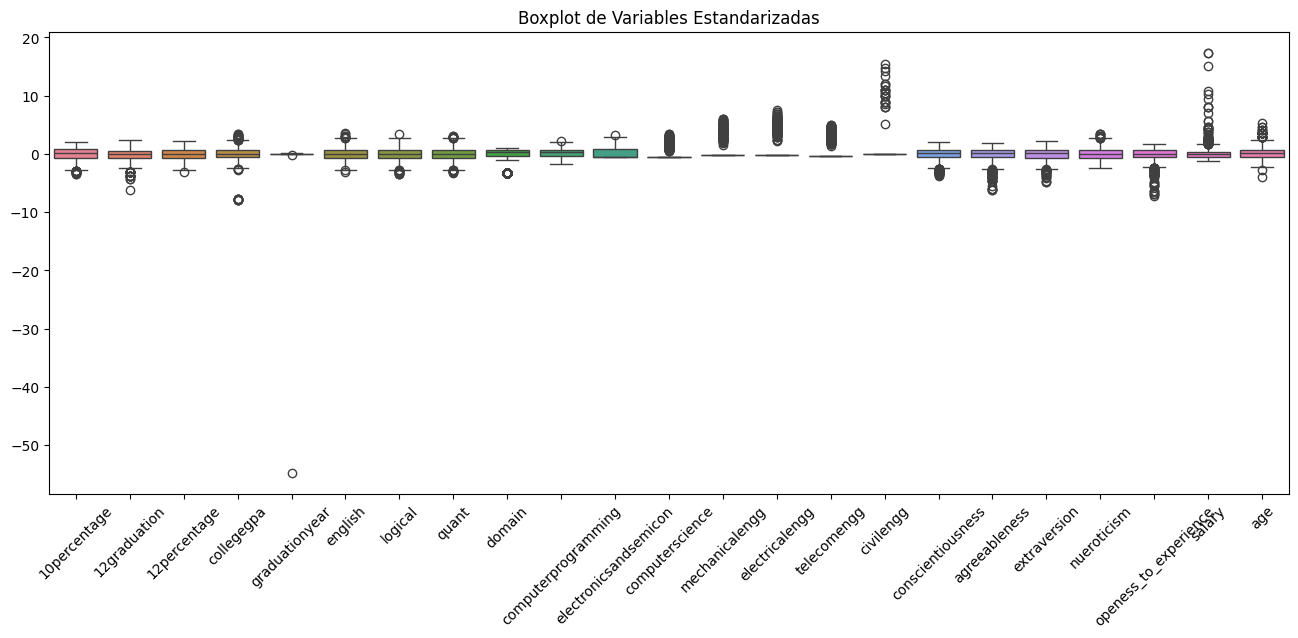

In [12]:
from sklearn.preprocessing import StandardScaler

df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Estandarizar los datos
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Gráfico de caja para todas las columnas estandarizadas
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_scaled)
plt.xticks(rotation=45)
plt.title('Boxplot de Variables Estandarizadas')
plt.show()


<Figure size 1000x600 with 0 Axes>

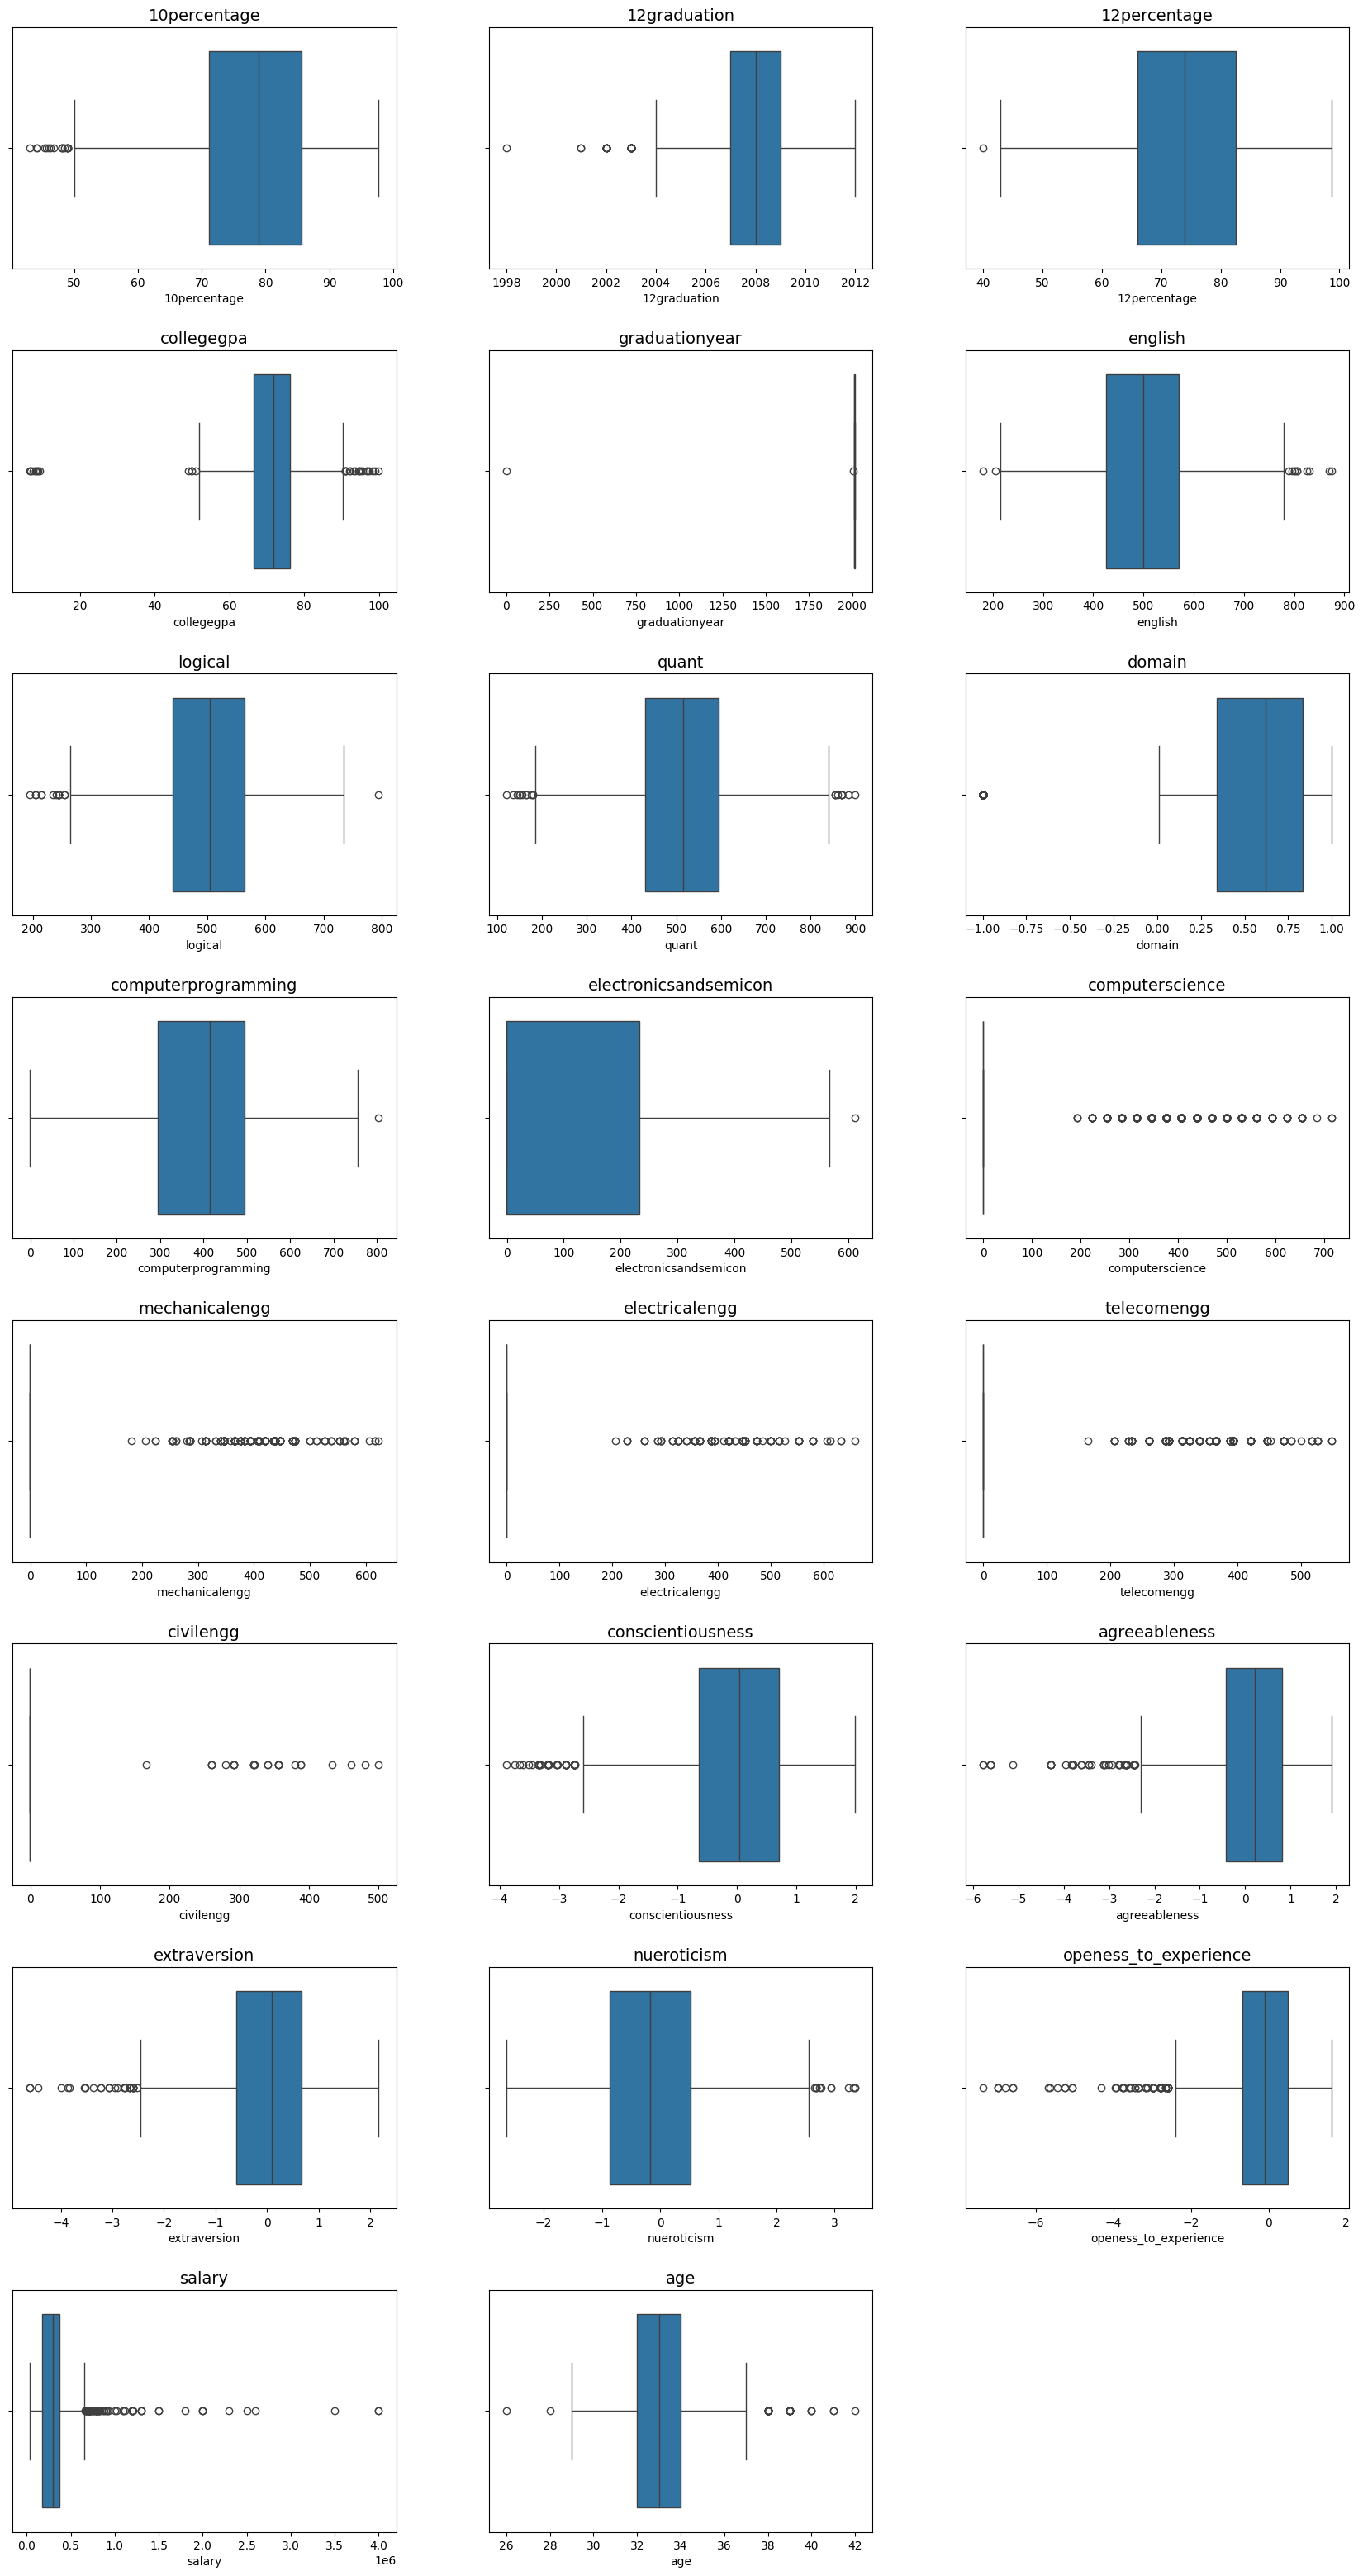

In [13]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Configuración de visualización para mejorar la legibilidad
plt.figure(figsize=(10, 6))

# Número de filas/columnas para el subplot
n_rows = len(df_numeric.columns) // 3 + (len(df_numeric.columns) % 3 > 0)
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*4))
fig.tight_layout(pad=5.0)

for i, col in enumerate(df_numeric.columns):
    row = i // n_cols
    col_idx = i % n_cols
    sns.boxplot(x=df_numeric[col], ax=axs[row, col_idx])
    axs[row, col_idx].set_title(col, fontsize=14)

# Ocultar gráficos vacíos si los hay
for j in range(i+1, n_rows*n_cols):
    axs[j // n_cols, j % n_cols].set_visible(False)

plt.show()

notes after the boxplots and the statistic descrive:
* `graduation year` have a 0 value needs to be removed
*  `collegegpa` seems to have some really low values, below 20. Further inspection needed
* `domain` had on -1 value, need to be removed
* `computerprogramming`,	`electronicsandsemicon`,	`computerscience`,	`mechanicalengg`,	`electricalengg`,	`telecomengg` and `civilengg` columns need further exploration about the -1 one values and without those values.

Column inspection by the distribution

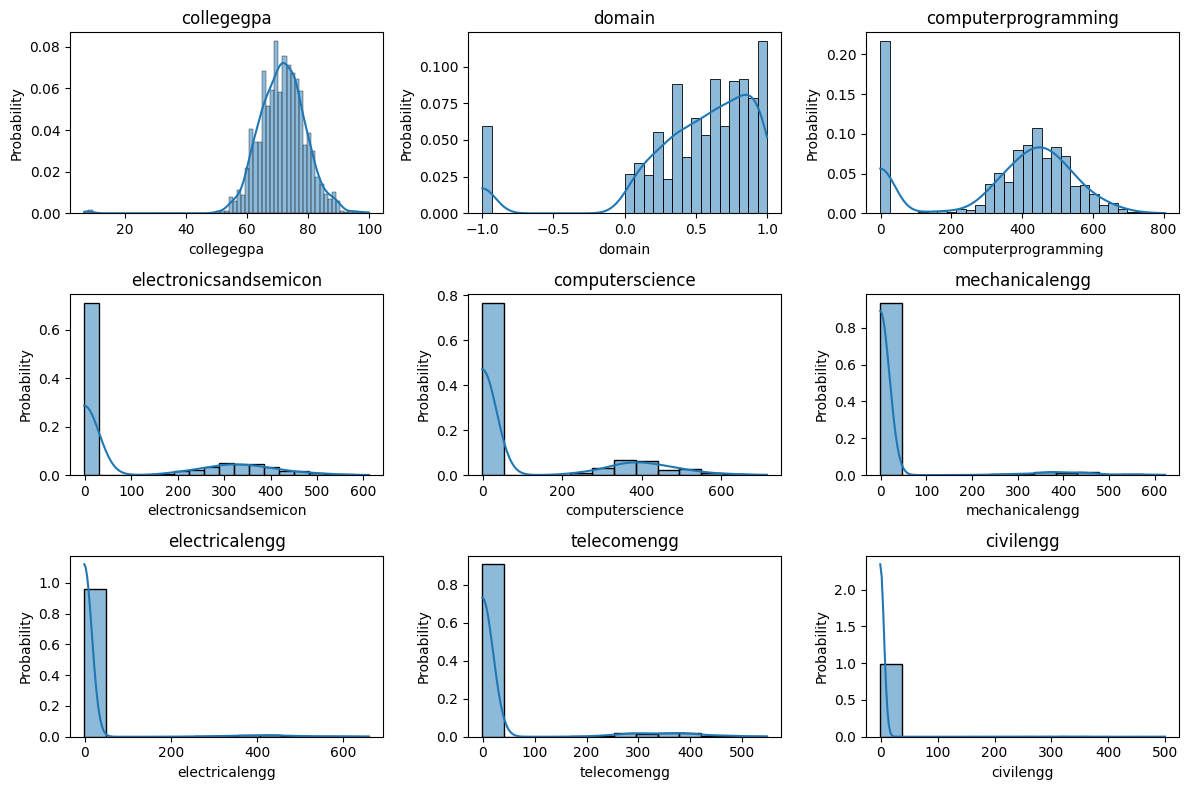

In [14]:
cols_to_plot = [
    'collegegpa','domain','computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]


# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.histplot(df[col], kde=True, stat='probability')  # kde=True agrega una estimación de densidad kernel
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
cols_to_plot = [
    'computerprogramming', 'electronicsandsemicon', 'computerscience',
    'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg'
]
for i in cols_to_plot:
  value = len(df[i][df[i] == -1]) / len(df[i])
  print(f'For the col {i}, {round(value*100,2)}% of the data are -1')


For the col computerprogramming, 21.68% of the data are -1
For the col electronicsandsemicon, 71.15% of the data are -1
For the col computerscience, 76.65% of the data are -1
For the col mechanicalengg, 93.76% of the data are -1
For the col electricalengg, 95.93% of the data are -1
For the col telecomengg, 90.86% of the data are -1
For the col civilengg, 99.13% of the data are -1


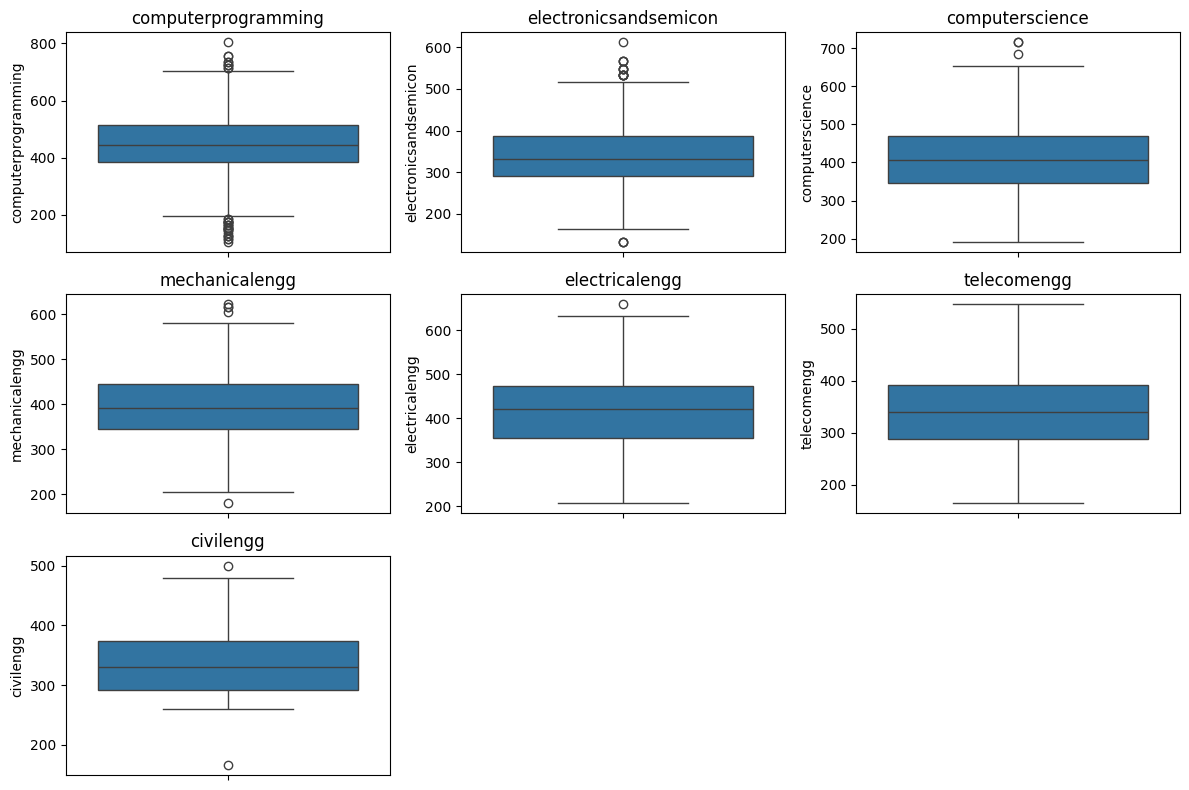

In [16]:

# Configuración del tamaño del gráfico
plt.figure(figsize=(12, 8))

# Iterar a través de la lista de columnas para generar los boxplots
for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(3, 3, i)  # Ajusta los números aquí según el número de gráficos. Aquí se asume una disposición de 3x3.
    # Filtrar los valores -1 antes de graficar
    sns.boxplot(y=df[df[col] != -1][col])
    plt.title(col)

plt.tight_layout()
plt.show()

notes:

* `civilengg` has to many -1, consider to drop it, same for the `electricalengg` and the `mechanicalengg` column

numercial columns cleaning

In [17]:
df = df[(df['graduationyear'] != 0) & (df['collegegpa'] >= 20) & (df['domain'] != -1)]


### Further inspection needed

In [18]:
df.drop(columns=['civilengg', 'electricalengg', 'mechanicalengg'], inplace = True)

<ipython-input-18-8099eec6e372>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['civilengg', 'electricalengg', 'mechanicalengg'], inplace = True)


correlation map between numerical variables

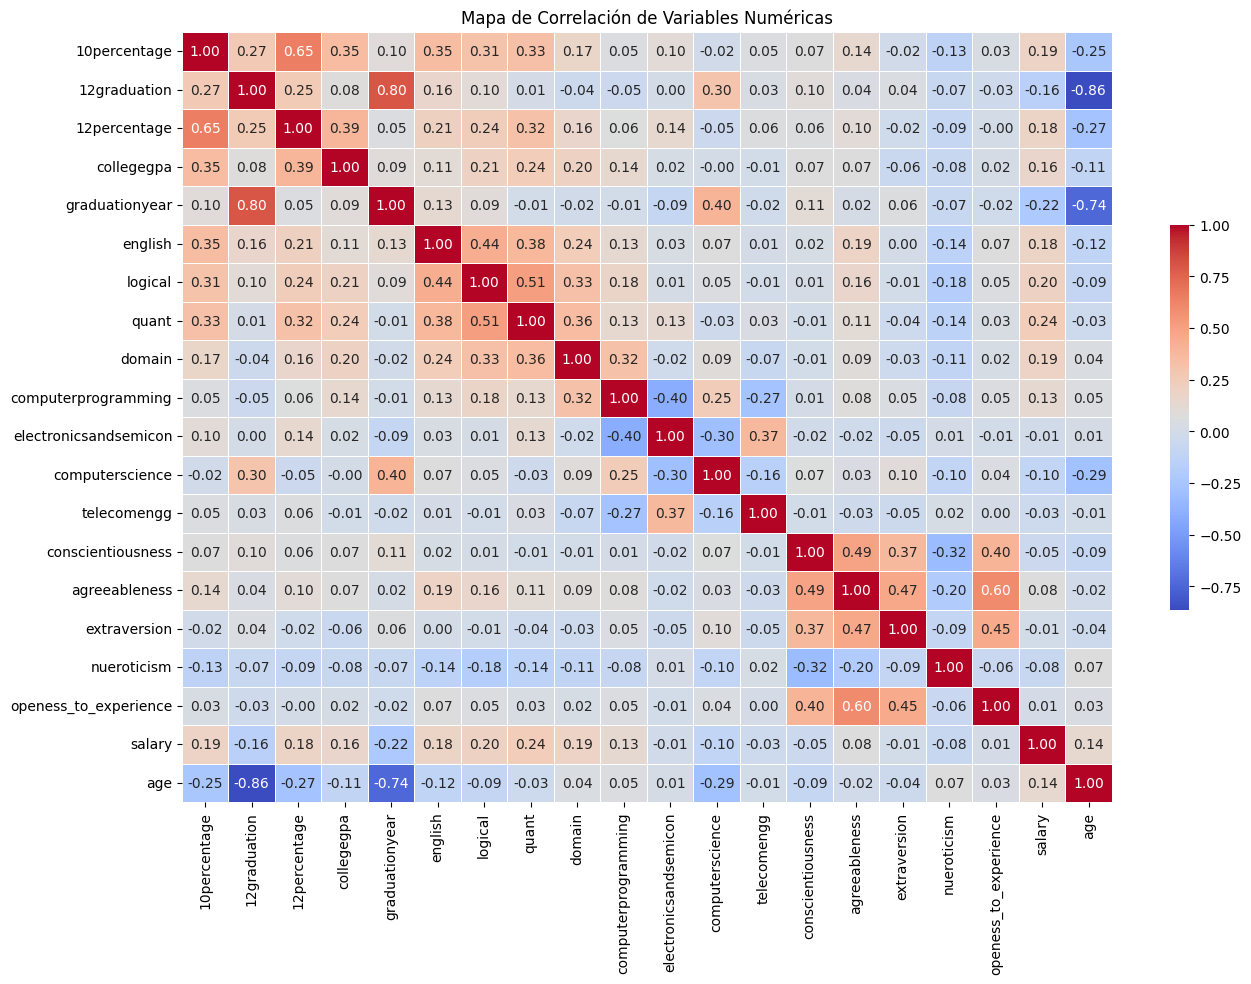

In [19]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

heat map without -1 values

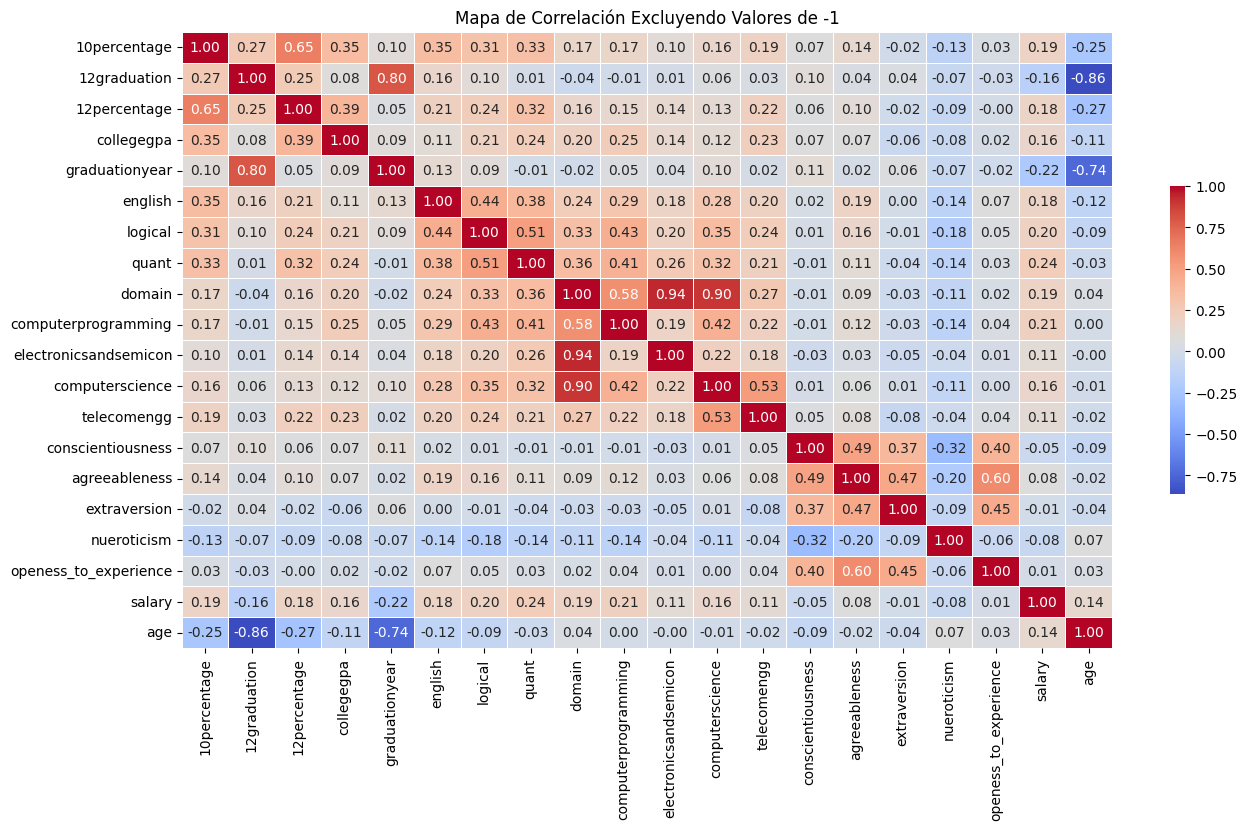

In [20]:
df_numeric_no_neg_ones = df.select_dtypes(include=['float64', 'int64']).replace(-1, np.nan)

# Calcular la matriz de correlación sobre el DataFrame actualizado
corr_matrix = df_numeric_no_neg_ones.corr()

# Crear el heatmap de correlación
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Mapa de Correlación Excluyendo Valores de -1')
plt.show()

droped columns due correlation:

1) `12graduation`, `graduationyear` are correlated with `age`

2) `10percentage` is correlated with `12peercentage`

3)

categorical variables distribution

In [21]:
df[df['specialization'].str.contains('&|and', na=False)]['specialization'].unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications',
       'electronics and communication engineering',
       'computer science and technology',
       'electronics and electrical engineering',
       'electronics & instrumentation eng',
       'electronics and instrumentation engineering',
       'applied electronics and instrumentation',
       'electronics and computer engineering',
       'mechanical and automation', 'industrial & management engineering',
       'industrial & production engineering',
       'information & communication technology'], dtype=object)

In [22]:
df[['specialization1', 'specialization2']] = df['specialization'].str.split(' *& *| *and *', n=1, expand=True)

# Hacer trim a los valores en las nuevas columnas para quitar espacios iniciales y finales
df['specialization1'] = df['specialization1'].str.strip()
df['specialization2'] = df['specialization2'].str.strip()
df.drop(columns=['specialization', 'dob'], inplace = True)

In [23]:
df.head(2)

,id,gender,10percentage,12graduation,12percentage,collegeid,collegetier,degree,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,telecomengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary,age,specialization1,specialization2
0,604399,f,87.8,2009,84.0,6920,1,B.Tech/B.E.,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-0.1590,0.3789,1.2396,0.1459,0.2889,445000,33,instrumentation,control engineering
1,988334,m,57.0,2010,64.5,6624,2,B.Tech/B.E.,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,1.1336,0.0459,1.2396,0.5262,-0.2859,110000,33,computer science,engineering


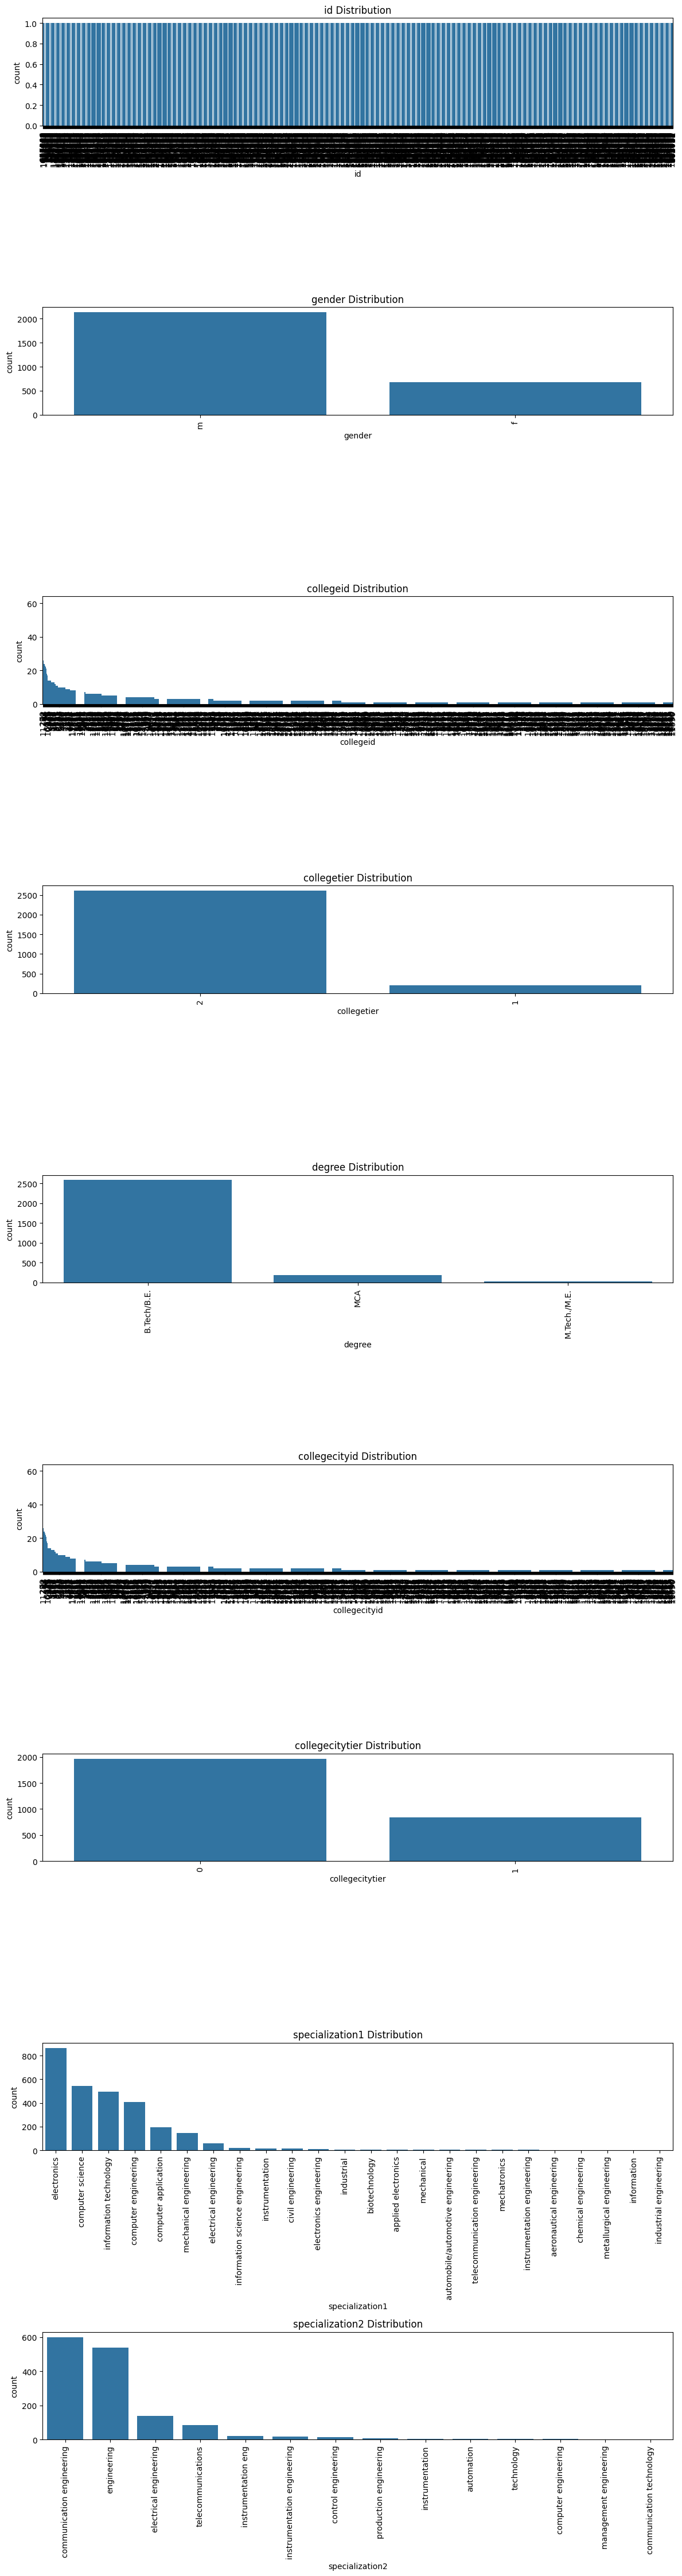

In [24]:
df_categorical = df.select_dtypes(include=['object', 'category'])

plt.figure(figsize=(12, 5 * len(df_categorical.columns)))

for i, col in enumerate(df_categorical.columns, 1):
    plt.subplot(len(df_categorical.columns), 1, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



### 3. Explore Target variable

In [ ]:
target = 'salary'

In [139]:
df[target]

0       0.103405
1       0.018916
2       0.055485
3       0.097100
4       0.041614
          ...   
2993    0.021438
2994    0.021438
2995    0.088272
2996    0.124842
2997    0.041614
Name: salary, Length: 2809, dtype: float64

### 4. Explore Variables of Interest

In [28]:
df_train

,id,gender,dob,10percentage,12graduation,12percentage,collegeid,collegetier,degree,specialization,collegegpa,collegecityid,collegecitytier,graduationyear,english,logical,quant,domain,computerprogramming,electronicsandsemicon,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,salary
0,604399,f,1990-10-22,87.80,2009,84.00,6920,1,B.Tech/B.E.,instrumentation and control engineering,73.82,6920,1,2013,650,665,810,0.694479,485,366,-1,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,2010,64.50,6624,2,B.Tech/B.E.,computer science & engineering,65.00,6624,0,2014,440,435,210,0.342315,365,-1,-1,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,2007,85.17,9084,2,B.Tech/B.E.,electronics & telecommunications,61.94,9084,0,2011,485,475,505,0.824666,-1,400,-1,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,2009,86.00,8195,1,B.Tech/B.E.,computer science & engineering,80.40,8195,1,2013,675,620,635,0.990009,655,-1,-1,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,2008,75.00,4889,2,B.Tech/B.E.,biotechnology,64.30,4889,1,2012,575,495,365,0.278457,315,-1,-1,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,103174,f,1989-04-17,75.00,2005,73.00,1263,2,B.Tech/B.E.,electronics and communication engineering,70.00,1263,1,2010,505,485,445,0.538387,245,333,-1,-1,-1,-1,-1,-1.1901,0.9688,-1.0697,1.35490,0.0284,120000
2994,352811,f,1991-07-22,84.00,2008,77.00,9481,2,B.Tech/B.E.,information technology,75.20,9481,0,2012,345,585,395,0.190153,315,-1,-1,-1,-1,-1,-1,-0.1082,0.0328,-0.4891,-0.29020,0.5024,120000
2995,287070,m,1988-11-24,91.40,2006,65.56,547,2,B.Tech/B.E.,information technology,73.19,547,0,2011,385,425,485,0.600057,435,-1,-1,-1,-1,-1,-1,-0.8810,0.1888,-0.3440,0.06230,0.6603,385000
2996,317336,m,1988-08-25,88.64,2006,65.16,1629,2,B.Tech/B.E.,computer engineering,74.81,1629,1,2011,465,645,505,0.901490,545,-1,-1,-1,-1,-1,-1,1.4374,1.2808,-0.4891,-1.46537,0.5419,530000


### 5. Prepare Data

intital preprocesing

In [102]:

# def clean_and_preprocess_df(df_treated):
#     # Hacer una copia para evitar modificar el DataFrame original
#     df_processing = df_treated.copy()


#     df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)
#     # Convertir 'dob' a datetime y calcular 'age'
#     df_processing['dob'] = pd.to_datetime(df_processing['dob'])
#     df_processing['age'] = df_processing['dob'].apply(
#         lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day))
#     )

#     # Dividir 'specialization' en dos y hacer trim, antes de aplicar el one-hot encoding
#     df_processing[['specialization1', 'specialization2']] = df_processing['specialization'].str.split(' *& *| *and *', n=1, expand=True)
#     df_processing['specialization1'] = df_processing['specialization1'].str.strip()
#     df_processing['specialization2'] = df_processing['specialization2'].str.strip()


#     # Aplicar filtros
#     df_processing = df_processing[(df_processing['graduationyear'] != 0) & (df_processing['collegegpa'] >= 20) & (df_processing['domain'] != -1)]

#     df_processing.drop(columns=['id','specialization', 'dob'], inplace=True)


#     numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns
#     scaler = MinMaxScaler()
#     df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])



#     # Codificación one-hot con pd.get_dummies
#     dummies_df = pd.get_dummies(df_processing[['gender', 'specialization1', 'specialization2']], drop_first=True)
#     df_processing = pd.concat([df_processing, dummies_df], axis=1)
#     df_processing.drop(['gender', 'specialization1', 'specialization2'], axis=1, inplace=True)

#     # Mapeo manual para codificación ordinal de 'degree'
#     degree_mapping = {'B.Tech/B.E.': 0, 'M.Tech./M.E.': 1, 'MCA': 2}
#     df_processing['degree'] = df_processing['degree'].map(degree_mapping)

#     return df_processing



In [134]:
def clean_and_preprocess_df(df_treated):
    # Hacer una copia para evitar modificar el DataFrame original
    df_processing = df_treated.copy()


    df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']] = df_processing[['id','collegeid', 'collegetier', 'collegecityid', 'collegecitytier']].astype(str)
    # Convertir 'dob' a datetime y calcular 'age'
    df_processing['dob'] = pd.to_datetime(df_processing['dob'])
    df_processing['age'] = df_processing['dob'].apply(
        lambda x: datetime.datetime.now().year - x.year - ((datetime.datetime.now().month, datetime.datetime.now().day) < (x.month, x.day))
    )

    # Dividir 'specialization' en dos y hacer trim, antes de aplicar el one-hot encoding
    df_processing[['specialization1', 'specialization2']] = df_processing['specialization'].str.split(' *& *| *and *', n=1, expand=True)
    df_processing['specialization1'] = df_processing['specialization1'].str.strip()
    df_processing['specialization2'] = df_processing['specialization2'].str.strip()


    # Aplicar filtros
    df_processing = df_processing[(df_processing['graduationyear'] != 0) & (df_processing['collegegpa'] >= 20) & (df_processing['domain'] != -1)]

    df_processing.drop(columns=['id','specialization', 'dob'], inplace=True)


    numeric_cols = df_processing.select_dtypes(include=['float64', 'int64']).columns
    scaler = MinMaxScaler()
    df_processing[numeric_cols] = scaler.fit_transform(df_processing[numeric_cols])



    # Codificación one-hot con pd.get_dummies
    dummies_df = pd.get_dummies(df_processing[['gender', 'specialization1', 'specialization2']], drop_first=True)
    df_processing = pd.concat([df_processing, dummies_df.astype(int)], axis=1)
    df_processing.drop(['gender', 'specialization1', 'specialization2'], axis=1, inplace=True)

    # Mapeo manual para codificación ordinal de 'degree'
    degree_mapping = {'B.Tech/B.E.': 0, 'M.Tech./M.E.': 1, 'MCA': 2}
    df_processing['degree'] = df_processing['degree'].map(degree_mapping)

    return df_processing

In [184]:
def filter_and_add_columns(df, columns_list):
    # Crear una copia del DataFrame para no modificar el original
    df_filtered = df.copy()


    # Identificar las columnas que están en la lista pero no en el DataFrame
    missing_columns = [col for col in columns_list if col not in df_filtered.columns]

    # Agregar las columnas faltantes al DataFrame, llenándolas con 0
    for col in missing_columns:
        df_filtered[col] = 0

    # Filtrar el DataFrame para mantener solo las columnas que están en la lista
    df_filtered = df_filtered[[col for col in df_filtered.columns if col in columns_list]]
    # Asegurarse de que el orden de las columnas en el DataFrame resultante sea el mismo que en columns_list
    df_filtered = df_filtered[columns_list]

    return df_filtered

### exp

In [185]:
df_model = clean_and_preprocess_df(df_train)

In [186]:
y = df_model['salary']  # Asegúrate de que 'Salary' es el nombre correcto de tu variable objetivo
X = df_model.drop('salary', axis=1)  # Eliminar la variable objetivo del conjunto de características

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)

In [187]:
mse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MSE: {mse}')

MSE: 0.03857782918080358


In [188]:
columns = X.columns

evaluar

In [191]:
df_model_test = clean_and_preprocess_df(df_test)
y = df_model_test['salary']  # Asegúrate de que 'Salary' es el nombre correcto de tu variable objetivo
X = filter_and_add_columns(df_model_test.drop('salary', axis=1),columns) # Eliminar la variable objetivo del conjunto de características

# Evaluar el modelo
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred, squared=False)

print(f'MSE: {mse}')

MSE: 0.11995256077302903


In [192]:
df_model_val = clean_and_preprocess_df(df_val)
y = df_model_val['salary']  # Asegúrate de que 'Salary' es el nombre correcto de tu variable objetivo
X = filter_and_add_columns(df_model_val.drop('salary', axis=1),columns) # Eliminar la variable objetivo del conjunto de características

# Evaluar el modelo
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred, squared=False)

print(f'MSE: {mse}')

MSE: 0.06489386511066804


TODO:
1) probar con las otros df, osea crear un pipeline y entender como funciona

2) revisar si es overfitting

3) probar cambiando los -1 a 0 o ver que mas puedo hacer

4) escoger las columans que mas importan y empecer a limpiar

### 6. Split Dataset

In [ ]:
stop

In [ ]:
df_val = clean_df(df_val)
df_test = clean_df(df_test)

In [ ]:
df.columns

In [ ]:
x_columns = ['id', 'gender', '10percentage', '12graduation', '12percentage',
       'collegeid', 'collegetier', 'degree', 'collegegpa', 'collegecityid',
       'collegecitytier', 'graduationyear', 'english', 'logical', 'quant',
       'domain', 'computerprogramming', 'electronicsandsemicon',
       'computerscience', 'telecomengg', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience',  'age',
       'specialization1', 'specialization2']

In [ ]:
X_train = df[x_columns]
X_val = df_val[x_columns]
X_test = df_test[x_columns]

y_train = df[target]
y_val = df_val[target]
y_test = df_test[target]

### 7. Baseline Model

In [ ]:
y_mean = y_train.mean()
y_central = np.full(y_train.shape, y_mean)
y_central_val = np.full(y_val.shape, y_mean)
y_central_test = np.full(y_test.shape, y_mean)

In [ ]:
train_perf = mse(y_train, y_central, squared=False)
valid_perf = mse(y_val, y_central_val, squared=False)
test_perf = mse(y_test, y_central_test, squared=False)

print('train_perf: ', train_perf)
print('valid_perf: ', valid_perf)
print('test_perf: ', test_perf)


### 8. Train Machine Learning Model

In [ ]:
model =

### 9. Assess Model Performance

In [ ]:
model_train_perf =
model_valid_perf =
model_test_perf =

### 10. Dudas

1) en columnas de examen que tienen valores de -1, como la de los examenes, como se pueden tratar esos valores a la hora del modelo?

2) Como se puede definir quitar columnas con muchos valores faltantes?, ejemplo: `civilengg` con mas de 99% de valores en -1

3) En una columna como puedo saber si puedo eliminar una categoria por tener muy pocos valores, esto como afecta el modelo? ejemplo:`degree` tiene casi todos los valores en B.Tech y casi ningun valor de M. sc (Tech), es posible eliminar la categoria de M.sc(tech) o es mejor dejarla?

4) Como lidiar con los -1 en un calculo de correlacion, ejemplo, los dos mapas decorrelacion